In [1]:
#pip install lightgbm

In [2]:
#pip install xgboost

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt


# Exploratory Data Analysis (EDA):

In [4]:
test_data= pd.read_csv("C:\ExcelR\DS\Assignment\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

In [5]:
train_data=pd.read_csv("C:\ExcelR\DS\Assignment\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")

In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Checking for missing values in the training and test datasets
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

train_missing, test_missing


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

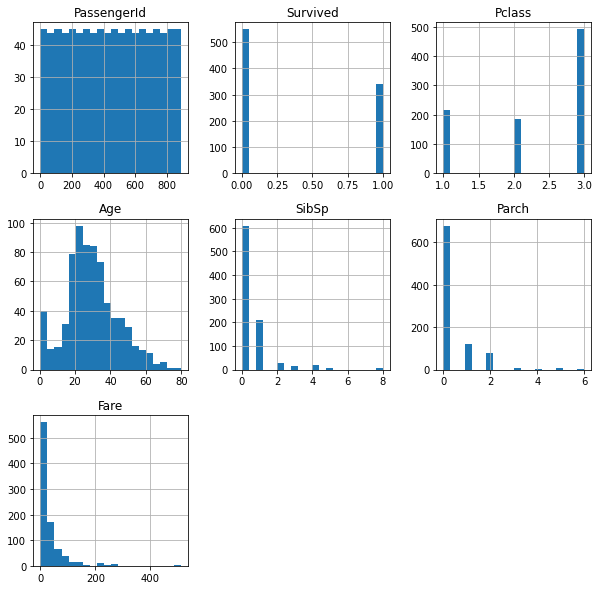

In [9]:
# Histograms for numerical features
train_data.hist(bins=20, figsize=(10, 10))


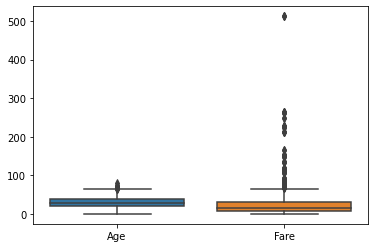

In [10]:
# Box plots to detect outliers
sns.boxplot(data=train_data[['Age', 'Fare']])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

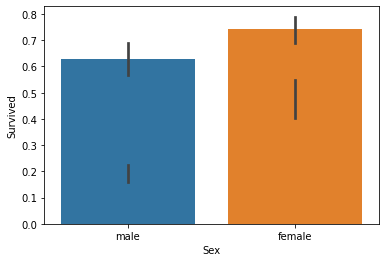

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
sns.barplot(x='Sex', y='Survived', data=train_data)


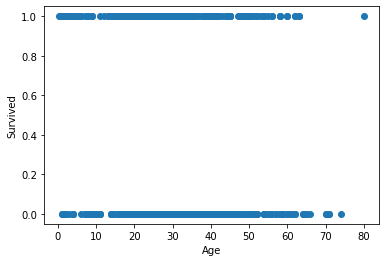

In [12]:
plt.scatter(train_data['Age'], train_data['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


# Data Preprocessing:

In [13]:
# Impute Age and Embarked
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Drop Cabin as it has many missing values
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)


In [14]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


In [15]:
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


In [16]:
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


# Building Predictive Models:

In [17]:

X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create the LightGBM dataset
train_data_lgb = lgb.Dataset(X_train, label=y_train)

# Parameters for LGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05
}

# Train the LightGBM model
model_lgb = lgb.train(params, train_data_lgb, num_boost_round=100)
y_pred_lgb = (model_lgb.predict(X_test) > 0.5).astype(int)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [19]:
# Train XGBoost model
model_xgb = xgb.XGBClassifier(learning_rate=0.05, n_estimators=100, use_label_encoder=False)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


In [20]:
# LightGBM Performance
print("LGBM Accuracy: ", accuracy_score(y_test, y_pred_lgb))
print("LGBM Precision: ", precision_score(y_test, y_pred_lgb))
print("LGBM Recall: ", recall_score(y_test, y_pred_lgb))
print("LGBM F1-Score: ", f1_score(y_test, y_pred_lgb))



LGBM Accuracy:  0.8268156424581006
LGBM Precision:  0.8115942028985508
LGBM Recall:  0.7567567567567568
LGBM F1-Score:  0.7832167832167832


In [21]:
# XGBoost Performance
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision: ", precision_score(y_test, y_pred_xgb))
print("XGBoost Recall: ", recall_score(y_test, y_pred_xgb))
print("XGBoost F1-Score: ", f1_score(y_test, y_pred_xgb))


XGBoost Accuracy:  0.8268156424581006
XGBoost Precision:  0.8412698412698413
XGBoost Recall:  0.7162162162162162
XGBoost F1-Score:  0.7737226277372262


# 4. Comparative Analysis

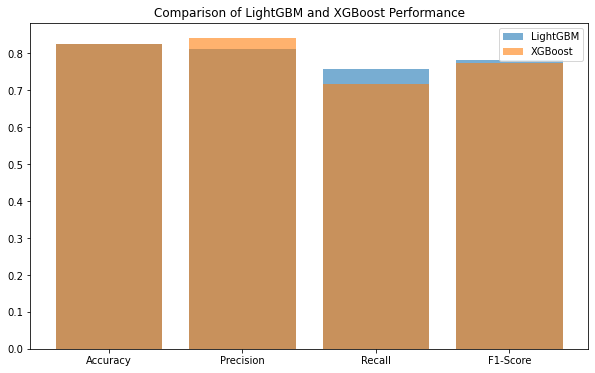

In [22]:
# Example code for plotting comparison

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgbm_scores = [accuracy_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_lgb)]
xgb_scores = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)]

plt.figure(figsize=(10, 6))
plt.bar(metrics, lgbm_scores, alpha=0.6, label='LightGBM')
plt.bar(metrics, xgb_scores, alpha=0.6, label='XGBoost')
plt.legend()
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.show()
